# ETL Pipeline Preparation


#### In this section, we explore the text messages data and prototype the ETL process.

#### The result will be encapsulated into a python script “etl_pipeline".

### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe.
- Load `categories.csv` into a dataframe.

In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.pipeline import Pipeline

In [6]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [7]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.tail()

,id,categories
26243,30261,related-0;request-0;offer-0;aid_related-0;medi...
26244,30262,related-0;request-0;offer-0;aid_related-0;medi...
26245,30263,related-1;request-0;offer-0;aid_related-0;medi...
26246,30264,related-1;request-0;offer-0;aid_related-1;medi...
26247,30265,related-1;request-0;offer-0;aid_related-0;medi...


#### sanity checks

In [5]:
categories.shape, messages.shape

((26248, 2), (26248, 4))

In [9]:
# messages.id is the same as categories.id
sum(messages.id != categories.id)

0

#### Each value in the 'categories' columns contains both the category names and the labels for that text message.

we shall first extract the category names.

In [10]:
text = categories.iloc[0].categories
text

'related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0'

In [11]:
# list of category names
columns = [x[:-2] for x in text.split(';')]

columns

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

### 2. Extract the category labels for each message from the 'categories' column.
We shall: 
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. 

- read off the labels

- pack the labels into a dataframe df_labels

In [12]:
# create a dataframe of the 36 individual category columns:

# 2 helper functions
split = lambda x: x.split(';')
extract_label = lambda lst: [int(y[-1]) for y in lst]

# extract labels
labels = categories[['categories']].applymap(split).applymap(extract_label).values

# list of lists
labels = list(map(lambda x: list(x[0]), labels))

# dataframe
df_labels = pd.DataFrame(labels, columns=columns)

df_labels

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26245,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26246,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Explore the distributions for each categories

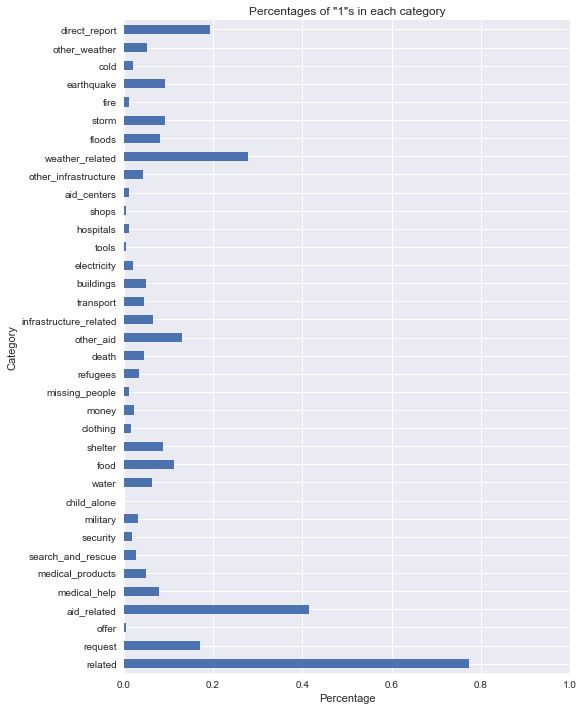

In [27]:
perc = df_labels.mean()

plt.figure(figsize=(8,12))
perc.plot.barh()
plt.title('Percentages of "1"s in each category')
plt.ylabel('Category')
plt.xlim(0,1)
plt.xlabel('Percentage')
plt.show()

In [61]:
# exam if there is any linear relations among categories
perc.related - perc.aid_related - perc.infrastructure_related - perc.weather_related

0.01634410240780254

In [63]:
perc[3] - sum(perc[4:19]), perc[18]

(-0.3173575129533679, 0.13136238951539164)

### 3. Merge 'messages' and 'df_labels'

In [30]:
# drop the original categories column from `df`

df = pd.concat([messages, df_labels], axis=1).drop('id', axis=1)

df.head()

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.shape

(26248, 39)

### 4. Cleaning: remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [32]:
# check number of duplicates
df[df.duplicated()]

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
656,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2131,How much money did TV Latino American collect ...,Konbyen kob tv latino america ranmase miami,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2793,"Sir or madam, I'm hungry, I cannot stand becau...",Mesye ou madam mwen grangou mwen pa menm kakan...,direct,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3852,"Good evening staff of responsibles, please giv...",Bonswa staf responsab svp banm yon ti d paske ...,direct,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4630,(Delmas 33 Charboniere infomatyon s'il vous pl...,"Delmas 33, charbonniere, information please.",direct,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4893,"If I would like to find a job in cepoz, what s...",Si mwen ta renmen jwen travay nan cepoz ki sa ...,direct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4951,Good evening. we are writing to ask you for a ...,Bonswa nou ekri'w se pou nou mande'w yon ti d ...,direct,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5558,jel2 Acte 5: 29 2chr7 Lev11 Ecl9 Ecl4 jos5 ch...,jel2 Acte 5 : 29 2chr7 Lev11 Ecl9 Ecl4 jos5 c...,direct,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5772,"I am a victim. I need food, water and a radio.",Mwen se sinistre mmen bezwen manje dlo ak yon ...,direct,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6983,Good morning!How are you doing my brothers whe...,Bonjou! Kman nou ye fr'm yo? Kil sikln nan te ...,direct,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [33]:
# drop duplicates
df = df.drop_duplicates()

df.shape

(26215, 39)

In [35]:
# recheck duplicates
df[df.duplicated()]

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


### 5. Save the clean dataset into an sqlite database.


In [65]:
from sqlalchemy import create_engine

In [70]:
engine = create_engine('sqlite:///text_messages.db')
# if the table name already exists, replace it.
df.to_sql('labelled_messages', engine, index=False, if_exists='replace')

### 6. Package the ETL process into `etl_pipeline.py`


In [1]:
def transform_data(messages, categories):
    """
    Transform the text data into a dataframe with category encoding
    
    Input: 
    
    message - pd.DataFrame: contains 4 columns 'id', 'message', 'source', 'genre'.
    
    categories - pd.DataFrame: contains 2 columns 'id', 'categories', where each value in the 'categories' columns
    is string indicating the categories that the message belongs to, example: 'related-1;request-0;offer-0;....'
    
    Output:
    
    return a dataframe merging the two input dataframes and dummy encoded the message categories.
    
    """

    #df = messages.join(categories.set_index('id'), on='id').drop('id', axis=1)
    
    # read off the names of all categories, store in a list 'columns'
    text = categories.iloc[0].categories
    columns = [x[:-2] for x in text.split(';')]
    
    # extract all category labels into a dataframe df_labels
    
    # 2 auxilary functions to process the 'categories' columns in categories
    split = lambda x: x.split(';')
    extract_label = lambda lst: [int(y[-1]) for y in lst]
    
    # read off the labels
    labels = categories[['categories']].applymap(split).applymap(extract_label).values
    
    # transform into a list of lists
    labels = list(map(lambda x: list(x[0]), labels))
    
    # transform into a dataframe
    df_labels = pd.DataFrame(labels, columns=columns)

    # concatenate with the messages dataframe
    df = pd.concat([df.drop('categories', axis=1), df_labels], axis=1)

    df = df.drop_duplicates()
    
    return df


In [2]:

def main():
    """
    Main function for process_messages.py.
    Implement ETL process for the input data. 
    """
    import sys
    import numpy as np
    import pandas as pd
    from sklearn.pipeline import Pipeline
    from sqlalchemy import create_engine
    
    # Extract data
    messages = pd.read_csv(sys.argv[1])
    categories = pd.read_csv(sys.argv[2])
    
    # check if the numbers of rows in both dataframes are the same
    if messages.shape[0]!=categories.shape[0]:
        print('Error: the numbers of rows in the two input datasets are different.')
        
    if len(sys.argv)>3:
        database = sys.argv[3]
    else:
        database = 'Disaster_Response.db'
        
    if len(sys.argv)>4:
        table_name = sys.argv[4]
    else:
        table_name = 'labelled_messages'
    
    print('Successfully extracted data.')
    
    
    # Transform data.
    df = transform_data(messages, categories)
    print('Successfully transformed data.')
    
    # Load data.
    engine = create_engine('sqlite:///'+database)
    df.to_sql(table_name, engine, index=False)  
    print(f'Successfully loaded data, saved in database {database} as table {table_name}')
    